Initial Data:
  Component Current Location Target Location Upgrade Date  Downtime (Hours)  \
0  Server A            Cloud            Edge   2024-07-15               2.5   
1  Server B            Cloud            Edge   2024-07-16               3.0   
2  Server C            Cloud            Edge   2024-07-17               1.0   
3  Server D            Cloud            Edge   2024-07-18               4.0   
4  Server E            Cloud            Edge   2024-07-19               2.0   

   Performance Before Upgrade (Mbps)  Performance After Upgrade (Mbps)  \
0                                100                               150   
1                                 80                               130   
2                                120                               180   
3                                 90                               140   
4                                110                               160   

    Issues Reported  Cost (USD) Completion Status  
0             

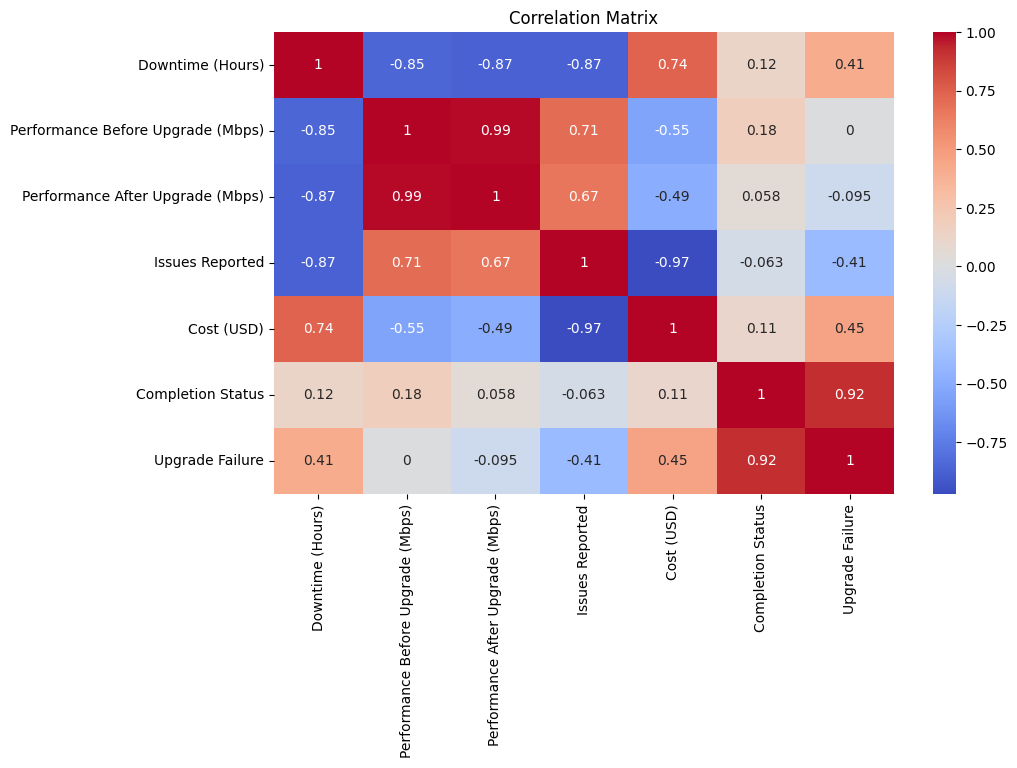


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

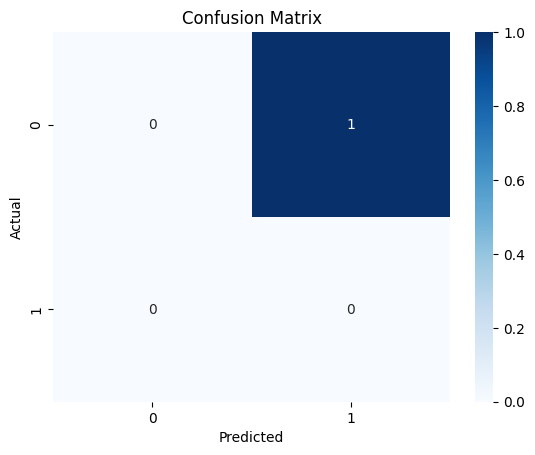


Prediction for new data (1 = Failure, 0 = No Failure): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Data Preparation
# Create a sample dataset
data = {
    'Component': ['Server A', 'Server B', 'Server C', 'Server D', 'Server E'],
    'Current Location': ['Cloud', 'Cloud', 'Cloud', 'Cloud', 'Cloud'],
    'Target Location': ['Edge', 'Edge', 'Edge', 'Edge', 'Edge'],
    'Upgrade Date': ['2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-19'],
    'Downtime (Hours)': [2.5, 3.0, 1.0, 4.0, 2.0],
    'Performance Before Upgrade (Mbps)': [100, 80, 120, 90, 110],
    'Performance After Upgrade (Mbps)': [150, 130, 180, 140, 160],
    'Issues Reported': ['None', 'Network Latency', 'None', 'Hardware Failure', 'None'],
    'Cost (USD)': [5000, 6000, 5500, 7000, 5300],
    'Completion Status': ['Completed', 'Completed', 'Completed', 'In Progress', 'Planned']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the data
print("Initial Data:")
print(df)

# Step 2: Data Preprocessing
# Convert categorical data to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['Issues Reported'] = label_encoder.fit_transform(df['Issues Reported'])
df['Completion Status'] = label_encoder.fit_transform(df['Completion Status'])

# Convert 'Upgrade Date' to datetime format
df['Upgrade Date'] = pd.to_datetime(df['Upgrade Date'])

# Create a target variable for upgrade failure prediction (1 = Failure, 0 = No Failure)
df['Upgrade Failure'] = df['Completion Status'].apply(lambda x: 1 if x != 0 else 0)

# Drop unnecessary columns for the model
df = df.drop(['Component', 'Current Location', 'Target Location', 'Upgrade Date'], axis=1)

print("\nProcessed Data:")
print(df)

# Step 3: Exploratory Data Analysis (EDA)
# Visualize correlations between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Model Building
# Split the data into training and testing sets
X = df.drop('Upgrade Failure', axis=1)
y = df['Upgrade Failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 6: Prediction
# Example of making a prediction with new data
# Ensure the new data array has the same number of features as the training data
new_data = np.array([[3.0, 80, 130, 1, 6000, 0]]).reshape(1, -1)  # Example data with all 6 features

# Make sure the order of the features in new_data matches the training data order
prediction = rf_model.predict(new_data)

print(f"\nPrediction for new data (1 = Failure, 0 = No Failure): {prediction[0]}")
